In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/advertising_ef.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


# Data Preprocessing

Dealing with Null Values

In [ ]:
data.isna().sum()

Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64

There are null values present inside some of the columns of the dataset

In [ ]:
data.rename(columns={'Daily Time Spent on Site':'Daily_Time_Spent_on_Site'}, inplace=True)

In [ ]:
print(data['Daily_Time_Spent_on_Site'].mean())
print(data['Daily_Time_Spent_on_Site'].median())

65.00946268656728
68.37


In [ ]:
data['Daily_Time_Spent_on_Site'].fillna(data['Daily_Time_Spent_on_Site'].median(),inplace=True)

Imputed ands replaced the null values of Daily Time Spent On Site with its Median

In [ ]:
print(data['Age'].mean())
print(data['Age'].median())

35.96292585170341
35.0


Here we have checked for the mean and median value of Age column to find with which we can replace our null values

In [ ]:
data['Age'].fillna(data['Age'].median(),inplace=True)

Since Age cannot be in decimals so we consider the median of Age column to replace null values

Similiarly we check For 'Area Income' column

In [ ]:
print(data['Area Income'].mean())
print(data['Area Income'].median())

54958.573617234484
56998.245


In [ ]:
data['Area Income'].fillna(data['Area Income'].mean(),inplace=True)

Filled the null values with the mean of Area Income and then rounding the numbers upto two decimals

In [ ]:
data['Area Income'] = np.around(data['Area Income'],decimals=2)

In [ ]:
data['Daily Internet Usage'].fillna(data['Daily Internet Usage'].mean(),inplace=True)

In [ ]:
data['City'].value_counts().index[0]

'Williamsport'

In [ ]:
data['City'].fillna(data['City'].value_counts().index[0],inplace=True)

In [ ]:
data['Country'].value_counts().index[0]
data['Country'].fillna(data['Country'].value_counts().index[0],inplace=True)

In [ ]:
data.isna().sum()

Daily_Time_Spent_on_Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

All the Null values have been imputed

Finding the Correlation Betweeen The Columns

In [ ]:
data.corr()

,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
Daily_Time_Spent_on_Site,1.000000,-0.327560,0.310296,0.514047,-0.742900
Age,-0.327560,1.000000,-0.178185,-0.366353,0.487808
Area Income,0.310296,-0.178185,1.000000,0.331394,-0.472515
Daily Internet Usage,0.514047,-0.366353,0.331394,1.000000,-0.785501
Clicked on Ad,-0.742900,0.487808,-0.472515,-0.785501,1.000000


In [ ]:
import seaborn as sns

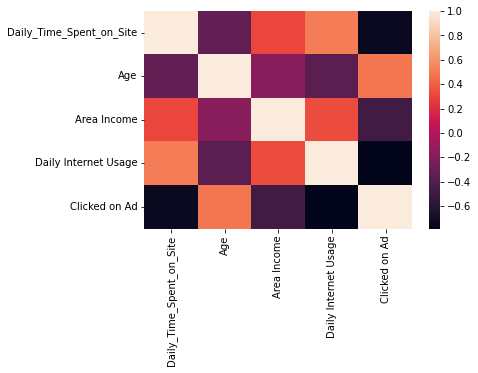

In [ ]:
sns.heatmap(data.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


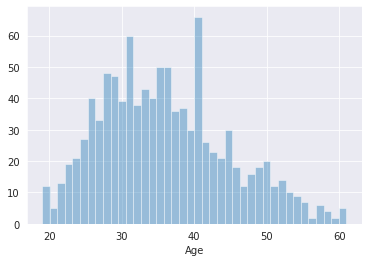

In [ ]:
sns.set_style('darkgrid')
sns.distplot(data['Age'], kde=False, bins=40)

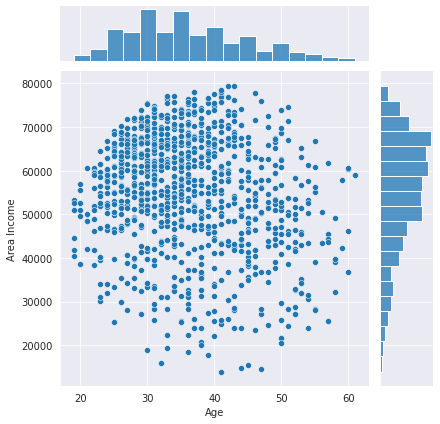

In [ ]:
sns.jointplot(x='Age', y='Area Income', data=data)

Analysing Joint Plot Between Area Income column and Age Column

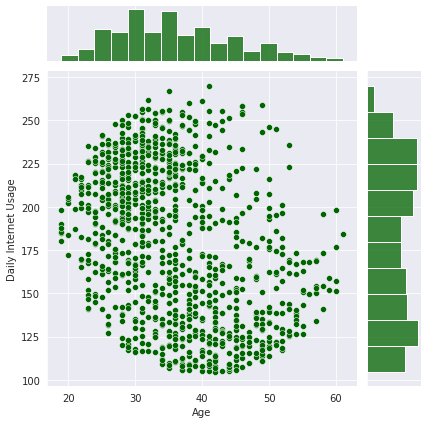

In [ ]:
sns.jointplot(x='Age', y='Daily Internet Usage', data=data, color='darkgreen')

Analysing Joint Plot Between Daily Internet Usage Column and Age Column

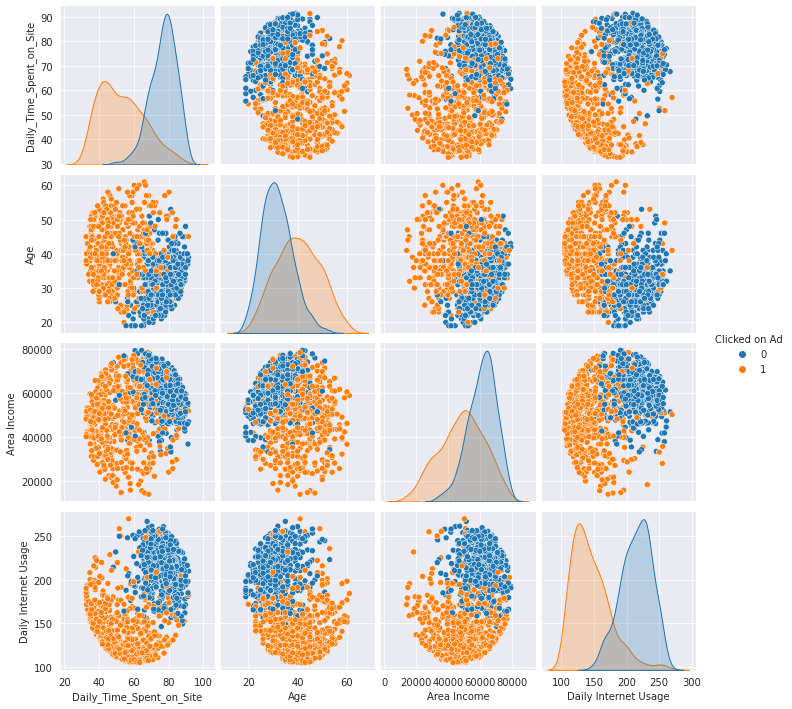

In [ ]:
sns.pairplot(data, hue='Clicked on Ad')

Analysing the relation between each and every variable present in the dataset with target function Clicked On Ad

Checking Whether There is Class imbalance in the Dataset

In [ ]:
data['Clicked on Ad'].value_counts()

1    506
0    503
Name: Clicked on Ad, dtype: int64

In [ ]:
data.to_csv('Cleaned_Advertisements.csv')

The occurence of '1' is 506 and of '0' is 503. So there is not much difference and there both are equally probable in the dataset 

Here we take our Cleaned Dataset On which we have applied Preprocessing

# Data Modelling

In [ ]:
data = pd.read_csv('Cleaned_Advertisements.csv')

In [ ]:
data.head()

,Unnamed: 0,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,1,68.37,31,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1009 non-null   int64  
 1   Daily_Time_Spent_on_Site  1009 non-null   float64
 2   Age                       1009 non-null   int64  
 3   Area Income               1009 non-null   float64
 4   Daily Internet Usage      1009 non-null   float64
 5   Ad Topic Line             1009 non-null   object 
 6   City                      1009 non-null   object 
 7   Gender                    1009 non-null   object 
 8   Country                   1009 non-null   object 
 9   Timestamp                 1009 non-null   object 
 10  Clicked on Ad             1009 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 86.8+ KB


Checking the number of unique values present in column AD Topic Line, City And Country

In [ ]:
object_Dtype = ['Ad Topic Line', 'City', 'Country']
data[object_Dtype].describe(include=['O'])

,Ad Topic Line,City,Country
count,1009,1009,1009
unique,1000,961,237
top,Proactive non-volatile encryption,Williamsport,Czech Republic
freq,2,14,22


Here we can see these columns have many unique values in them which will make it difficult to find a pattern from these columns to make a suitable model for predictions.

So we reject the columns Ad Topic Line, City, Country 

Now checking for Time Stamp Column which is object Data type.
We Split the column into two different Columns Month and Hour. So that Our model can effectively Target the best timezone trends.

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Month'] = data['Timestamp'].dt.month
data['Hour'] = data['Timestamp'].dt.hour
data = data.drop(['Timestamp'], axis=1)

In [ ]:
data.head()

,Unnamed: 0,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month,Hour
0,0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,0,3,0
1,1,68.37,31,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,0,4,1
2,2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,0,3,20
3,3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,0,10,2
4,4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,0,3,3


In [ ]:
data.rename(columns={'Unnamed: 0':'Unnamed'}, inplace=True)

Dropped The Unnamed:0 column from the dataset

In [ ]:
data.drop('Unnamed',axis=1,inplace=True)

Label Encoding Gender Column using Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [ ]:
data.head()

,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,0
1,68.37,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,10,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,3,3


Our Dataset is a classification Dataset i.e. it predicts values ither '0' or '1' which is not clicked or clicked resp.

So the models which we can apply on our dataset could be :

Desicion Tree Classifier

Logistic Regression

SVM

Naive Bayes Classifier

Ensemble Model

Here we discard the Ensemble Method as there is no Class Imbalance in our dataset

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
y = data['Clicked on Ad']
X = data.iloc[:,[0,1,2,3,6,9,10]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X,y

(      Daily_Time_Spent_on_Site  Age  Area Income  Daily Internet Usage  \
 0                        68.95   35     61833.90                256.09   
 1                        68.37   31     68441.85                193.77   
 2                        69.47   26     59785.94                236.50   
 3                        74.15   29     54806.18                245.89   
 4                        68.37   35     73889.99                225.58   
 ...                        ...  ...          ...                   ...   
 1004                     72.97   30     71384.57                208.58   
 1005                     51.30   45     67782.17                134.42   
 1006                     51.63   51     42415.72                120.37   
 1007                     55.55   19     41920.79                187.95   
 1008                     45.01   26     29875.80                178.35   
 
       Gender  Month  Hour  
 0          0      3     0  
 1          1      4     1  
 2         

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
ypred_train = dt.predict(X_train)
ypred_test = dt.predict(X_test)

In [ ]:
ypred_train,ypred_test

(array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report
print(f"Accuracy score is on Train data {accuracy_score(y_train,ypred_train)}")
print(f"Accuracy score is on Test data {accuracy_score(y_test,ypred_test)}")
print(f"F1 score is on Test data {f1_score(y_test,ypred_test)}")
cm = confusion_matrix(y_test,ypred_test)
print(cm)

Accuracy score is on Train data 1.0
Accuracy score is on Test data 0.933993399339934
F1 score is on Test data 0.926470588235294
[[157   9]
 [ 11 126]]


In [ ]:
from sklearn.model_selection import cross_val_score 
accuracies_dt = cross_val_score(estimator = dt, X = X_test, y = y_test, cv = 10) 
print("For Decision Tree : ")
print(f"Mean of Accuracy Score Using cross validation is {accuracies_dt.mean()}")
print(f"Standard Deviation of Accuracy Score Using cross validation is {accuracies_dt.std()}")

For Decision Tree : 
Mean of Accuracy Score Using cross validation is 0.8907526881720429
Standard Deviation of Accuracy Score Using cross validation is 0.04266040103144505


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs')
logmodel.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
accuracy_score(y_test,predictions)

0.9644268774703557

In [ ]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       132
           1       0.97      0.96      0.96       121

    accuracy                           0.96       253
   macro avg       0.96      0.96      0.96       253
weighted avg       0.96      0.96      0.96       253

[[128   4]
 [  5 116]]


In [ ]:
from sklearn.model_selection import cross_val_score 
accuracies_logmodel = cross_val_score(estimator = logmodel, X = X_test, y = y_test, cv = 10) 
print("For Logistic Regression : ")
print(f"Mean of Accuracy Score on Test Data Using cross validation is {accuracies_logmodel.mean()}")
print(f"Standard Deviation of Accuracy Score on Test Data Using cross validation is {accuracies_logmodel.std()}")

For Logistic Regression : 
Mean of Accuracy Score on Test Data Using cross validation is 0.9641538461538461
Standard Deviation of Accuracy Score on Test Data Using cross validation is 0.033211176560319404


## Guassian Naive Bayes Classifier

In [ ]:
from sklearn.preprocessing import StandardScaler
se=StandardScaler()
x_train=se.fit_transform(X_train)
x_test=se.fit_transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred_test = bayes.predict(X_test)
y_pred_train = bayes.predict(X_train)
print(metrics.accuracy_score(y_test,y_pred_test))
print(metrics.accuracy_score(y_train,y_pred_train))

0.9438943894389439
0.9745042492917847


In [ ]:
from sklearn.model_selection import cross_val_score 
accuracies_bayes = cross_val_score(estimator = bayes, X = X_test, y = y_test, cv = 10) 
print("For Naive Bayes Classifier : ")
print(f"Mean of Accuracy Score on Test Data Using cross validation is {accuracies_bayes.mean()}")
print(f"Standard Deviation of Accuracy Score on Test Data Using cross validation is {accuracies_bayes.std()}")

For Naive Bayes Classifier : 
Mean of Accuracy Score on Test Data Using cross validation is 0.9502150537634408
Standard Deviation of Accuracy Score on Test Data Using cross validation is 0.03736632628657694


## SVM Model

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC 
svm = SVC(kernel = 'rbf', random_state = 0) 
svm.fit(X_train, y_train) 

y_pred = svm.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score 
accuracies_svm = cross_val_score(estimator = svm, X = X_test, y = y_test, cv = 10) 
print("For SVM: ")
print(f"Mean of Accuracy Score on Test Data Using cross validation is {accuracies_svm.mean()}")
print(f"Standard Deviation of Accuracy Score on Test Data Using cross validation is {accuracies_svm.std()}")

For SVM: 
Mean of Accuracy Score on Test Data Using cross validation is 0.9526153846153846
Standard Deviation of Accuracy Score on Test Data Using cross validation is 0.0297030670024008


**So After Training the dataset through different kind of Model we get :**

**From the Decision Tree Classifier Model we get :**
Mean of Accuracy score as 0.92
Standard Deviation of Accuracy score as 0.0395

**From the Logistic Regression Model we get :**
Mean of Accuracy score as 0.964
Standard Deviation of Accuracy score as 0.033

**From the Naive Bayes Model we get :**
Mean of Accuracy score as 0.9667
Standard Deviation of Accuracy score as 0.0394

**From the Naive Bayes Model we get :**
Mean of Accuracy score as 0.952
Standard Deviation of Accuracy score as 0.029

**We can see that For Logistic Regression Model standard deviation is also less and we get good accuracy**

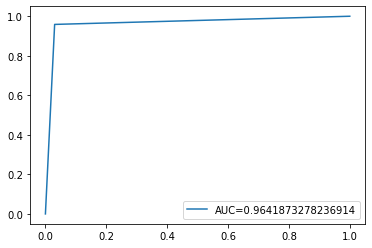

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_pred = logmodel.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

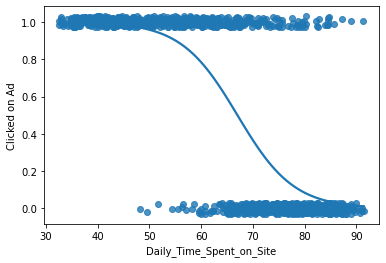

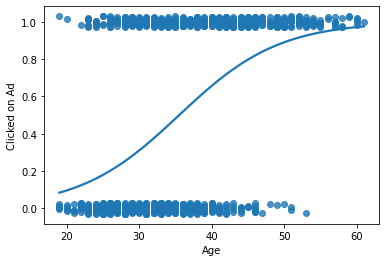

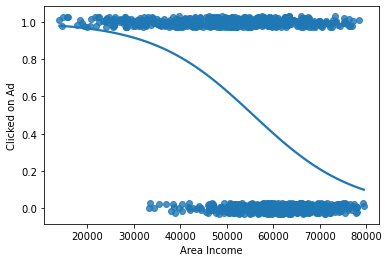

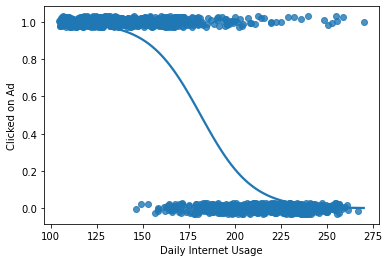

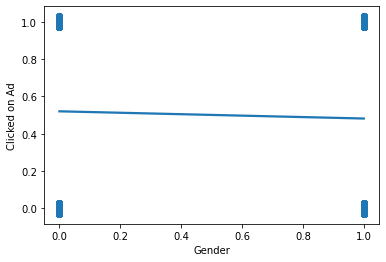

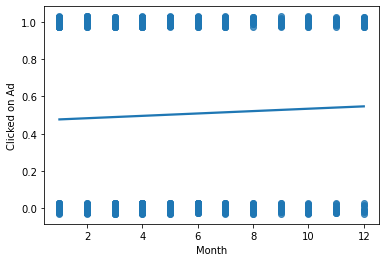

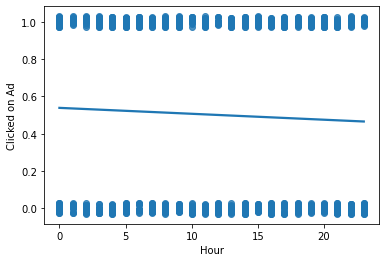

In [ ]:
import seaborn as sns
list = [0,1,2,3,6,9,10]
for i in list:
    sns.regplot(x=data.iloc[:,i],y="Clicked on Ad",y_jitter=0.03,data=data,logistic=True,ci=None)
    plt.show()

In [ ]:
logmodel.coef_,logmodel.intercept_

(array([[-2.70974432,  1.23882837, -1.38716648, -2.56341707, -0.05362825,
          0.33682223, -0.27285253]]),
 array([1.57519648]))

**Hence Final Equation Of the Logistic Regression Model is**

1.5751 + -2.7097*x1 + 1.2388*x2 - 1.3871*x3 - 2.5634*x4 -0.05362x5 + 0.3368*x6 - 0.2728*x7 = y